# Instacart case study

### Background

Delivery companies have become an essential component of our lives. We have many of them delivering either our food or our groceries. They have become a boon for busy family people or millennials who like to have everything delivered at the touch of a button. But things can go wrong, and often they get wrong. For example, if a faulty product is delivered, or the product is not in the right condition, sometimes they mess up the delivery addresses. In case of an issue, you have a reliable Customer support team helping the customers to raise a complaint or issue a refund. They are an essential business unit and ensure that the customers are not left hanging. However, for their proper functioning, staffing must align with the business demand. Hire too few of them, and one can't resolve customer issues fast enough. Hire too many people, you are increasing the business costs.  

### Case Study Objectives

Can you look at the sample data and generate
Any observations for the business? 
Insights on how you would staff the customer support team? What useful insights can you extract from the data?

The data here is similar to what is generated with Uber Eats, Flink, Blinkit, among others

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

### Importing, understanding and cleaning the data

In [2]:
url = "https://raw.githubusercontent.com/vkoul/data/main/misc/instacart.csv"
instacart = pd.read_csv(url,parse_dates = ["order_delivery_time"])
instacart.head()

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region
0,2014-06-02 04:23:16+00:00,233599337,5,NaN,chi
1,2014-06-02 03:57:50+00:00,233599376,5,NaN,chi
2,2014-06-02 02:52:38+00:00,233599328,5,NaN,chi
3,2014-06-02 02:52:04+00:00,233599070,5,NaN,chi
4,2014-06-02 02:41:43+00:00,233599100,5,NaN,chi


In [3]:
instacart.tail()

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region
14952,2014-05-07 20:29:32+00:00,233614661,0,NaN,sf
14953,2014-05-05 23:59:17+00:00,233614666,0,NaN,sf
14954,2014-05-04 22:48:29+00:00,233614671,0,NaN,sf
14955,2014-05-03 17:41:36+00:00,233614676,0,NaN,sf
14956,2014-05-01 23:25:46+00:00,233614681,0,NaN,sf


In [4]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14957 entries, 0 to 14956
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   order_delivery_time      14957 non-null  datetime64[ns, UTC]
 1   order_id                 14957 non-null  int64              
 2   customer_order_rating    14957 non-null  int64              
 3   type_of_issue _reported  1087 non-null   object             
 4   region                   14957 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 584.4+ KB


In [5]:
instacart.describe()

,order_id,customer_order_rating
count,1.495700e+04,14957.000000
mean,1.041118e+08,4.558200
std,1.159783e+08,1.002157
min,2.080560e+05,0.000000
25%,2.329820e+05,5.000000
50%,2.458290e+05,5.000000
75%,2.335890e+08,5.000000
max,2.336147e+08,5.000000


In [6]:
instacart.groupby("customer_order_rating").count()

,order_delivery_time,order_id,type_of_issue _reported,region
customer_order_rating,,,,
0,154,154,3,154
1,373,373,169,373
2,370,370,194,370
3,778,778,329,778
4,1680,1680,285,1680
5,11602,11602,107,11602


In [7]:
instacart.describe(include="O")

,type_of_issue _reported,region
count,1087,14957
unique,7,4
top,Wrong item,sf
freq,374,6443


In [8]:
instacart.region.unique()

array(['chi', 'nyc', 'sf', 'sf '], dtype=object)

In [9]:
instacart.isna().mean()

order_delivery_time        0.000000
order_id                   0.000000
customer_order_rating      0.000000
type_of_issue _reported    0.927325
region                     0.000000
dtype: float64

In [10]:
instacart.duplicated().sum()

123

In [11]:
instacart[instacart.duplicated()]

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region
49,2014-06-02 00:18:47+00:00,233598909,5,Wrong item,chi
1035,2014-05-27 20:33:42+00:00,233589496,5,Damaged or spoiled,chi
2016,2014-05-21 03:34:31+00:00,233581307,5,Damaged or spoiled,chi
4706,2014-05-05 15:48:17+00:00,226767,5,Item charged incorrectly,chi
5491,2014-05-29 16:02:05+00:00,233593252,4,Wrong item,chi
...,...,...,...,...,...
14035,2014-05-25 19:54:35+00:00,233587170,1,Poor service,sf
14036,2014-05-25 19:54:35+00:00,233587170,1,Poor service,sf
14067,2014-05-15 19:30:03+00:00,241510,1,Poor service,sf
14080,2014-05-13 03:30:04+00:00,238244,1,Item missing,sf


Conclusions on cleaning required based on the above are:
- Order id is recorded as integer, which should be converted to object type
- There are 4 regions rather than 3: sf is apparently sometimes entered with a superfluous space which we will need to clean 
- Time is reported in UTC but we will need local times for the location for certain analysis (e.g. peak delivery times). We will introduce 3 columns for local times in each region to allow us to do the relevant analysis thereafter.
- We assume that ratings are usually from 1 (worst) to 5 (best). However, they appear to include 154 null-values, which would distort averages. Given that only 3 issues were reported in the null-value group, it seems safe to delete these rows.
- 123 duplicated rows need to be dropped

Convert order id column type:

In [12]:
instacart["order_id"]=instacart["order_id"].astype("object")

In [13]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14957 entries, 0 to 14956
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   order_delivery_time      14957 non-null  datetime64[ns, UTC]
 1   order_id                 14957 non-null  object             
 2   customer_order_rating    14957 non-null  int64              
 3   type_of_issue _reported  1087 non-null   object             
 4   region                   14957 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 584.4+ KB


Clean up regions:

In [14]:
instacart.region=instacart.region.str.strip()

In [15]:
instacart.region.unique()

array(['chi', 'nyc', 'sf'], dtype=object)

Insert local time columns:

In [16]:
instacart["nyc_time"]=instacart.order_delivery_time.dt.tz_convert("US/Eastern")
instacart["chi_time"]=instacart.order_delivery_time.dt.tz_convert("US/Central")
instacart["sf_time"]=instacart.order_delivery_time.dt.tz_convert("US/Pacific")

In [17]:
instacart.head()

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region,nyc_time,chi_time,sf_time
0,2014-06-02 04:23:16+00:00,233599337,5,NaN,chi,2014-06-02 00:23:16-04:00,2014-06-01 23:23:16-05:00,2014-06-01 21:23:16-07:00
1,2014-06-02 03:57:50+00:00,233599376,5,NaN,chi,2014-06-01 23:57:50-04:00,2014-06-01 22:57:50-05:00,2014-06-01 20:57:50-07:00
2,2014-06-02 02:52:38+00:00,233599328,5,NaN,chi,2014-06-01 22:52:38-04:00,2014-06-01 21:52:38-05:00,2014-06-01 19:52:38-07:00
3,2014-06-02 02:52:04+00:00,233599070,5,NaN,chi,2014-06-01 22:52:04-04:00,2014-06-01 21:52:04-05:00,2014-06-01 19:52:04-07:00
4,2014-06-02 02:41:43+00:00,233599100,5,NaN,chi,2014-06-01 22:41:43-04:00,2014-06-01 21:41:43-05:00,2014-06-01 19:41:43-07:00


Clean up ratings:

In [18]:
instacart=instacart[instacart["customer_order_rating"]!=0]

In [19]:
instacart.describe()

,customer_order_rating
count,14803.000000
mean,4.605620
std,0.892386
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


Drop duplicates:

In [20]:
instacart = instacart[~instacart.duplicated()]

In [21]:
instacart.duplicated().sum()

0

### Analysis

##### Understand most relevant issue types and analyse average customer rating associated with each of the issues:

In [22]:
instacart.groupby(["type_of_issue _reported"]).agg({"order_id":"count","customer_order_rating":"mean"}).reset_index().sort_values(by="order_id",ascending=False)

,type_of_issue _reported,order_id,customer_order_rating
6,Wrong item,329,3.151976
0,Damaged or spoiled,261,2.988506
2,Item missing,161,2.968944
5,Poor service,119,2.621849
4,Poor replacement,50,2.540000
3,Other Order Issue,21,3.190476
1,Item charged incorrectly,20,4.150000


It appears that all of the issues result in a lower average customer order rating.

##### Consider number of issues by region over time, and compare to number of deliveries by region to see where issues are the worst: 

C:\Users\Winterki\AppData\Local\Temp\ipykernel_29748\3659695278.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  instacart["week"] = np.where(instacart["region"]=="nyc",instacart["nyc_time"].dt.week,np.where(instacart["region"]=="chi",instacart["chi_time"].dt.week,instacart["sf_time"].dt.week))
C:\Users\Winterki\AppData\Local\Temp\ipykernel_29748\3659695278.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  instacart["week"] = np.where(instacart["region"]=="nyc",instacart["nyc_time"].dt.week,np.where(instacart["region"]=="chi",instacart["chi_time"].dt.week,instacart["sf_time"].dt.week))
C:\Users\Winterki\AppData\Local\Temp\ipykernel_29748\3659695278.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  instacart["week"] = np.where(instacart["

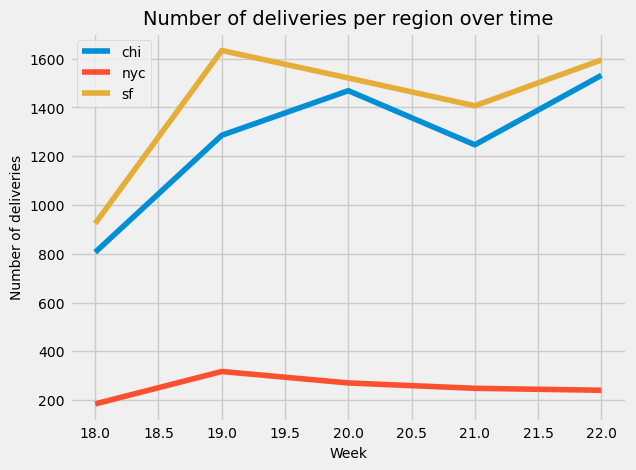

In [23]:
instacart["week"] = np.where(instacart["region"]=="nyc",instacart["nyc_time"].dt.week,np.where(instacart["region"]=="chi",instacart["chi_time"].dt.week,instacart["sf_time"].dt.week))
issues = instacart.groupby(["week","region"]).agg({"order_id":"count","type_of_issue _reported":"count"}).reset_index()
issues["issue_percent"]=(issues["type_of_issue _reported"]/issues.order_id).round(3).multiply(100)

sns.lineplot(data=issues,x="week",y="order_id",hue="region")
plt.title("Number of deliveries per region over time",fontsize=14)
plt.xlabel("Week",fontsize=10)
plt.ylabel("Number of deliveries",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

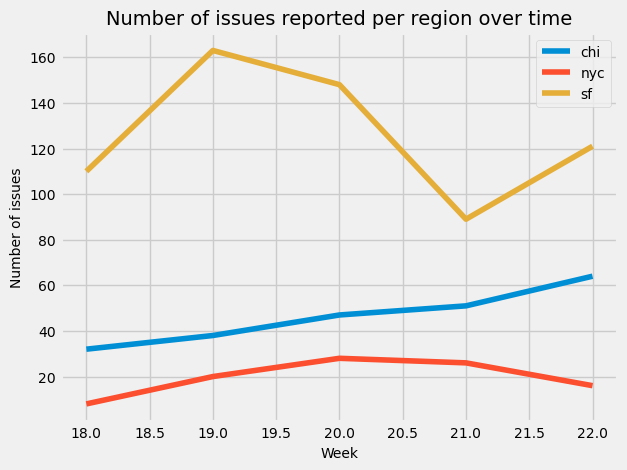

In [24]:
sns.lineplot(data=issues,x="week",y="type_of_issue _reported",hue="region")
plt.title("Number of issues reported per region over time",fontsize=14)
plt.xlabel("Week",fontsize=10)
plt.ylabel("Number of issues",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

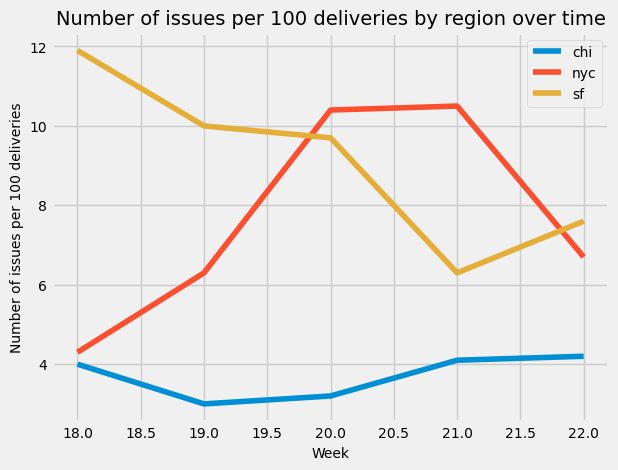

In [25]:
sns.lineplot(data=issues,x="week",y="issue_percent",hue="region")
plt.title("Number of issues per 100 deliveries by region over time",fontsize=14)
plt.xlabel("Week",fontsize=10)
plt.ylabel("Number of issues per 100 deliveries",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

It appears that Chicago is providing a better service than NYC and SF. It would be interesting to dig deeper and understand the drivers. SF has experienced a decline in issues per delivery, and again, it would be interesting to understand the drivers. That said, for the time being, it appears that you would need more support staff per 100 deliveries in NYC and SF for the time being, in order to help deal with issues as they arise. 

We will also perform an analysis of customer ratings per region to confirm that the above findings are also reflected in the development of customer ratings:

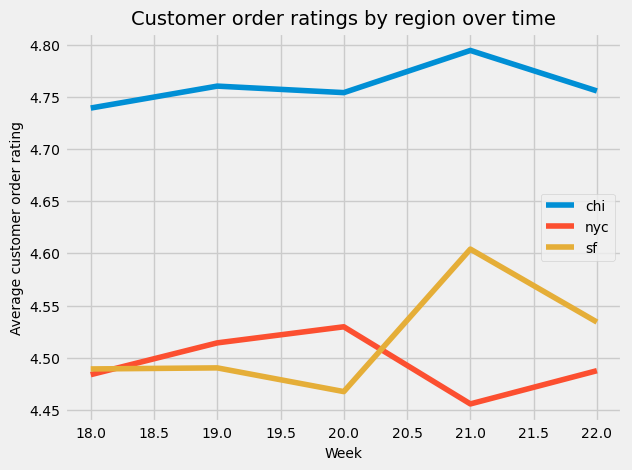

In [26]:
ratings = instacart.groupby(["week","region"])["customer_order_rating"].mean().reset_index()
sns.lineplot(data=ratings,x="week",y="customer_order_rating",hue="region")
plt.title("Customer order ratings by region over time",fontsize=14)
plt.xlabel("Week",fontsize=10)
plt.ylabel("Average customer order rating",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

This confirms our above assessment that the Chicago region appears to provide a better service than NYC and SF. The apparent improvement in SF service levels appears to be reflected in improving customer order ratings to an extent.

Check issue types by region to see if there is any interesting pattern:

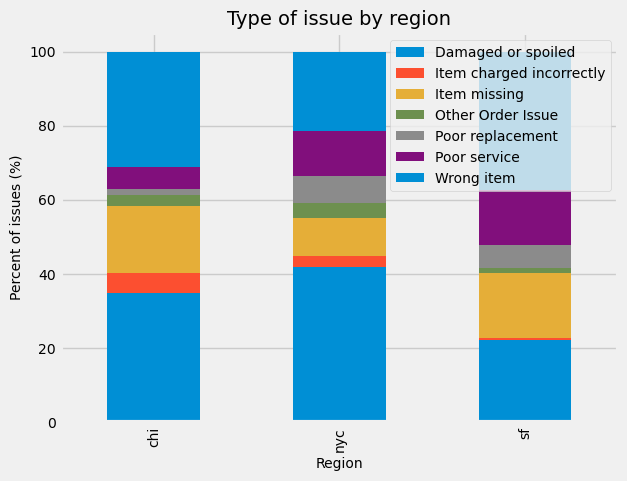

In [27]:
issue_types = instacart.groupby(["region","type_of_issue _reported"])["order_id"].count().reset_index()
issue_types1 = issue_types.pivot(columns="type_of_issue _reported",index="region",values="order_id")
issue_total = issue_types1.sum(axis=1)
issue_types2 = issue_types1.div(issue_total,axis=0).round(3).multiply(100)
issue_types2.plot(kind="bar",stacked=True)
plt.title("Type of issue by region",fontsize=14)
plt.xlabel("Region",fontsize=10)
plt.ylabel("Percent of issues (%)",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)     
plt.legend(fontsize=10)
plt.show()

It is interesting that "damaged or spoiled" is the issue most frequently seen in NYC and CHI, whilst in SF, "Wrong item" is the biggest issue. It would seem that the latter issue is typically a problem with the restaurants, whist "damaged or spoiled" is likely to have happened during transport - to be investigated further.

### Consider number of orders by weekday and by time of day to understand at what times (per region) the greatest number of support staff will be required

In [28]:
#Create local weekday and hour columns
instacart["weekday"]=np.where(instacart.region=="nyc",instacart.nyc_time.dt.day_name(),np.where(instacart.region=="chi",instacart.chi_time.dt.day_name(),instacart.sf_time.dt.day_name()))
instacart["hour"]=np.where(instacart.region=="nyc",instacart.nyc_time.dt.hour,np.where(instacart.region=="chi",instacart.chi_time.dt.hour,instacart.sf_time.dt.hour))
instacart["month"]=np.where(instacart.region=="nyc",instacart.nyc_time.dt.month,np.where(instacart.region=="chi",instacart.chi_time.dt.month,instacart.sf_time.dt.month))
instacart["day"]=np.where(instacart.region=="nyc",instacart.nyc_time.dt.day,np.where(instacart.region=="chi",instacart.chi_time.dt.day,instacart.sf_time.dt.day))
instacart.head() 

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region,nyc_time,chi_time,sf_time,week,weekday,hour,month,day
0,2014-06-02 04:23:16+00:00,233599337,5,NaN,chi,2014-06-02 00:23:16-04:00,2014-06-01 23:23:16-05:00,2014-06-01 21:23:16-07:00,22,Sunday,23,6,1
1,2014-06-02 03:57:50+00:00,233599376,5,NaN,chi,2014-06-01 23:57:50-04:00,2014-06-01 22:57:50-05:00,2014-06-01 20:57:50-07:00,22,Sunday,22,6,1
2,2014-06-02 02:52:38+00:00,233599328,5,NaN,chi,2014-06-01 22:52:38-04:00,2014-06-01 21:52:38-05:00,2014-06-01 19:52:38-07:00,22,Sunday,21,6,1
3,2014-06-02 02:52:04+00:00,233599070,5,NaN,chi,2014-06-01 22:52:04-04:00,2014-06-01 21:52:04-05:00,2014-06-01 19:52:04-07:00,22,Sunday,21,6,1
4,2014-06-02 02:41:43+00:00,233599100,5,NaN,chi,2014-06-01 22:41:43-04:00,2014-06-01 21:41:43-05:00,2014-06-01 19:41:43-07:00,22,Sunday,21,6,1


[]

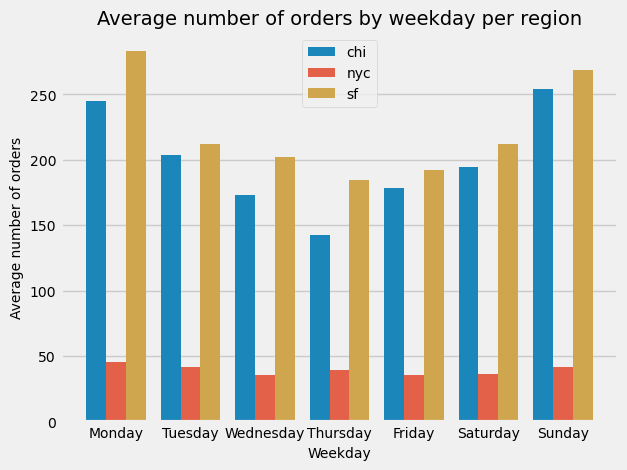

In [29]:
#Chart average orders per weekday per region

weekday1 = instacart.groupby(["region","week","weekday"])["order_id"].count().reset_index()
weekday2 = weekday1.groupby(["region","weekday"])["order_id"].mean().reset_index()

sns.barplot(data=weekday2,x="weekday",y="order_id",hue="region",order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Average number of orders by weekday per region",fontsize=14)
plt.xlabel("Weekday",fontsize=10)
plt.ylabel("Average number of orders",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.plot()

Somewhat to my surprise, it looks like Monday and Sunday are the busiest days for orders in particular in SF and CHI, which is when the greatest number of support staff should be present. Thursday appears to be the least busy day in SF and CHI.

In [30]:
#Chart average orders per hour per region

hour = instacart.groupby(["region","month","day","hour"])["order_id"].count().reset_index()
hour1 = hour.groupby(["region","hour"])["order_id"].mean().reset_index()

[]

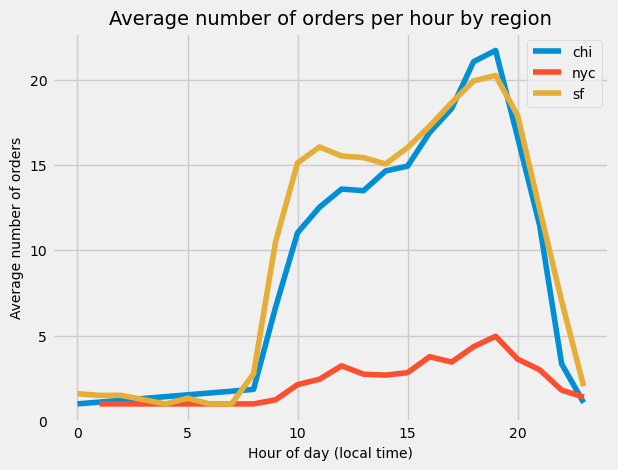

In [31]:
sns.lineplot(data=hour1,x="hour",y="order_id",hue="region")
plt.title("Average number of orders per hour by region",fontsize=14)
plt.xlabel("Hour of day (local time)",fontsize=10)
plt.ylabel("Average number of orders",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.plot()

All the regions appear to be busiest between 10am and 9pm, with a peak level experienced at 7pm. It would therefore seem to make sense to increase staffing of support roles during this time.

Finally, we check whether the hourly distribution of orders varies between weekdays for the different regions:

In [32]:
#Get relevant data:

weekday_hour = instacart.groupby(["region","week","weekday","hour"])["order_id"].count().reset_index()
nyc = weekday_hour.query("region=='nyc'").groupby(["weekday","hour"])["order_id"].mean().reset_index()
chi = weekday_hour.query("region=='chi'").groupby(["weekday","hour"])["order_id"].mean().reset_index()
sf = weekday_hour.query("region=='sf'").groupby(["weekday","hour"])["order_id"].mean().reset_index()


[]

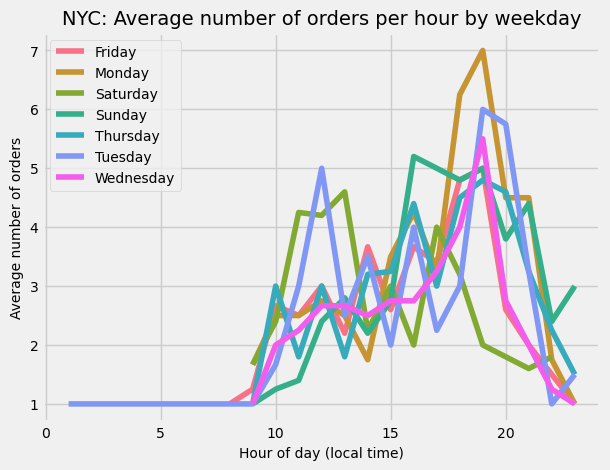

In [33]:
sns.lineplot(data=nyc,x="hour",y="order_id",hue="weekday")
plt.title("NYC: Average number of orders per hour by weekday",fontsize=14)
plt.xlabel("Hour of day (local time)",fontsize=10)
plt.ylabel("Average number of orders",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.plot()

[]

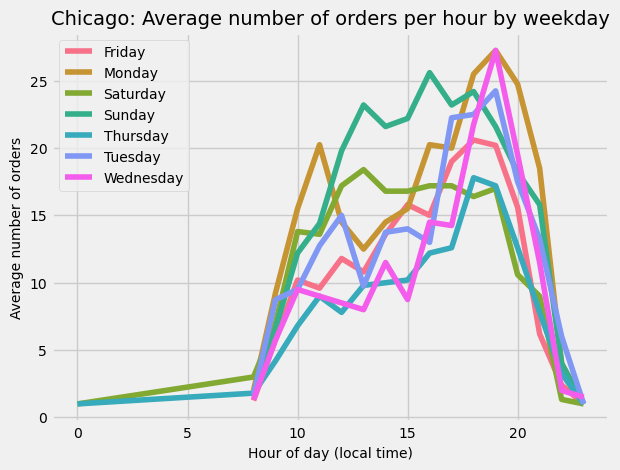

In [34]:
sns.lineplot(data=chi,x="hour",y="order_id",hue="weekday")
plt.title("Chicago: Average number of orders per hour by weekday",fontsize=14)
plt.xlabel("Hour of day (local time)",fontsize=10)
plt.ylabel("Average number of orders",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.plot()

[]

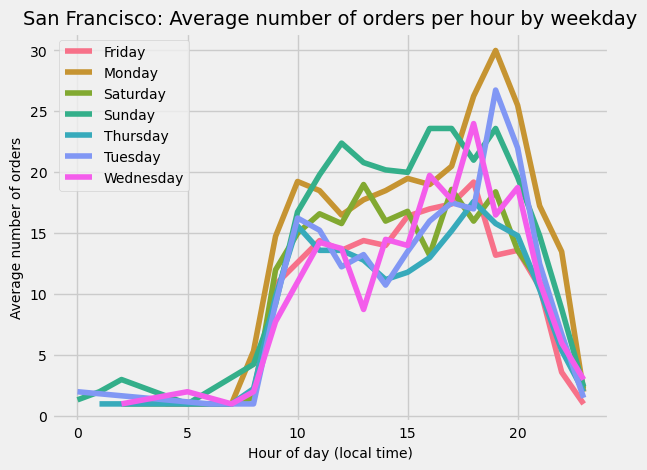

In [35]:
sns.lineplot(data=sf,x="hour",y="order_id",hue="weekday")
plt.title("San Francisco: Average number of orders per hour by weekday",fontsize=14)
plt.xlabel("Hour of day (local time)",fontsize=10)
plt.ylabel("Average number of orders",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.plot()

It appears that the typical order pattern varies in particular on the week-ends, when orders appear to be distributed more evenly during the day, with less obviously hourly peaks. It may therefore make sense to spread staffing for support roles more evenly during the weekend.